In [1]:
import pandas as pd

#load data
airports=pd.read_csv("data/airports.csv",encoding = "latin1")
events_US=pd.read_csv("data/events_US.csv",encoding = "latin1")
fares=pd.read_csv("data/fares.csv",encoding = "latin1")
flight_traffic=pd.read_csv("data/flight_traffic.csv",encoding = "latin1")
stock_prices=pd.read_csv("data/stock_prices.csv",encoding = "latin1")
weather=pd.read_csv("data/weather.csv",encoding = "latin1")

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster
import math

In [3]:
location = []
lats = []
longs = []
ids = []
for i in range(airports.latitude.size):
    if (~np.isnan(airports.latitude[i])):
        temp = [airports.latitude[i],airports.longitude[i]]
        ids.append(airports.airport_id)
        lats.append(temp[0])
        longs.append(temp[1])
        location.append(temp)

In [4]:
kmeans = cluster.KMeans(n_clusters = 10).fit(location)

In [5]:
plt.scatter(lats, longs, c=kmeans.labels_, cmap='viridis')

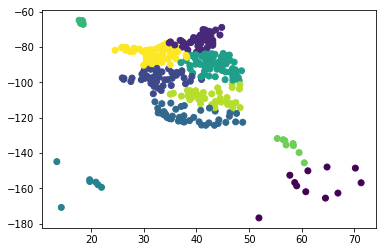

In [6]:
plt.show()

In [7]:
stock_prices.corr()

,AA,UA,B6,OO,AS,NK,WN,DL,HA
AA,1.000000,0.397999,0.626337,0.771373,-0.247823,-0.213474,0.772385,0.953588,-0.432380
UA,0.397999,1.000000,0.768571,-0.060218,0.623239,0.664136,0.505765,0.457156,0.487873
B6,0.626337,0.768571,1.000000,0.205292,0.319107,0.428252,0.643223,0.636877,0.230359
OO,0.771373,-0.060218,0.205292,1.000000,-0.659366,-0.482272,0.587605,0.768054,-0.702924
AS,-0.247823,0.623239,0.319107,-0.659366,1.000000,0.704576,0.004420,-0.182608,0.756895
NK,-0.213474,0.664136,0.428252,-0.482272,0.704576,1.000000,-0.103838,-0.136439,0.862343
WN,0.772385,0.505765,0.643223,0.587605,0.004420,-0.103838,1.000000,0.830354,-0.348522
DL,0.953588,0.457156,0.636877,0.768054,-0.182608,-0.136439,0.830354,1.000000,-0.389394
HA,-0.432380,0.487873,0.230359,-0.702924,0.756895,0.862343,-0.348522,-0.389394,1.000000


In [8]:
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

In [9]:
A = stock_prices.corr()

In [10]:
A.AA

AA    1.000000
UA    0.397999
B6    0.626337
OO    0.771373
AS   -0.247823
NK   -0.213474
WN    0.772385
DL    0.953588
HA   -0.432380
Name: AA, dtype: float64

In [11]:
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,...,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,1,AA,CLT,SGF,708,2,6,11,15,32,...,0,0,0,0,0,0,0,0,0,0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,...,0,0,5,0,0,0,0,0,0,28
2,1,DL,MSP,ISN,546,7,11,14,36,52,...,0,0,0,0,0,0,0,0,0,0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,...,0,0,0,0,0,0,0,0,0,0
4,1,DL,ATL,RIC,481,112,186,379,650,799,...,0,0,0,0,0,0,0,0,0,0


In [16]:
filteredAA = fares.loc[fares['airline_id'] == 'AA']
fares_AA = np.zeros((249,))
for i in range(249):
    fares_AA[i] = filteredAA[str(i+1)+'0'].sum()

filteredUA = fares.loc[fares['airline_id'] == 'UA']
fares_UA = np.zeros((249,))
for i in range(249):
    fares_UA[i] = filteredUA[str(i+1)+'0'].sum()

filteredB6 = fares.loc[fares['airline_id'] == 'B6']
fares_B6 = np.zeros((249,))
for i in range(249):
    fares_B6[i] = filteredB6[str(i+1)+'0'].sum()

filteredOO = fares.loc[fares['airline_id'] == 'OO']
fares_OO = np.zeros((249,))
for i in range(249):
    fares_OO[i] = filteredOO[str(i+1)+'0'].sum()
    
filteredAS = fares.loc[fares['airline_id'] == 'AS']
fares_AS = np.zeros((249,))
for i in range(249):
    fares_AS[i] = filteredAS[str(i+1)+'0'].sum()

filteredNK = fares.loc[fares['airline_id'] == 'NK']
fares_NK = np.zeros((249,))
for i in range(249):
    fares_NK[i] = filteredNK[str(i+1)+'0'].sum()

filteredWN = fares.loc[fares['airline_id'] == 'WN']
fares_WN = np.zeros((249,))
for i in range(249):
    fares_WN[i] = filteredWN[str(i+1)+'0'].sum()

filteredDL = fares.loc[fares['airline_id'] == 'DL']
fares_DL = np.zeros((249,))
for i in range(249):
    fares_DL[i] = filteredUA[str(i+1)+'0'].sum()

filteredHA = fares.loc[fares['airline_id'] == 'HA']
fares_HA = np.zeros((249,))
for i in range(249):
    fares_HA[i] = filteredHA[str(i+1)+'0'].sum()

In [25]:
sumAA = 0
for i in range(len(fares_AA)):
    sumAA+= 10*(i+1)*fares_AA[i]
averageAA = sumAA/fares_AA.sum()


sumAA_2 = 0
for i in range(len(fares_AA)):
    sumAA_2+= ((averageAA-(i+1)*10)**2)*fares_AA[i]
sigma_AA = math.sqrt(sumAA_2/fares_AA.sum())

sumUA = 0
for i in range(len(fares_UA)):
    sumUA+= 10*(i+1)*fares_UA[i]
averageUA = sumAA/fares_UA.sum()


sumUA_2 = 0
for i in range(len(fares_UA)):
    sumUA_2+= ((averageUA-(i+1)*10)**2)*fares_UA[i]
sigma_UA = math.sqrt(sumUA_2/fares_UA.sum())

sumB6 = 0
for i in range(len(fares_B6)):
    sumB6+= 10*(i+1)*fares_B6[i]
averageB6 = sumB6/fares_B6.sum()


sumB6_2 = 0
for i in range(len(fares_B6)):
    sumB6_2+= ((averageB6-(i+1)*10)**2)*fares_B6[i]
sigma_B6 = math.sqrt(sumB6_2/fares_B6.sum())

sumOO = 0
for i in range(len(fares_OO)):
    sumOO+= 10*(i+1)*fares_OO[i]
averageOO = sumOO/fares_OO.sum()


sumOO_2 = 0
for i in range(len(fares_OO)):
    sumOO_2+= ((averageOO-(i+1)*10)**2)*fares_OO[i]
sigma_OO = math.sqrt(sumOO_2/fares_OO.sum())

sumAS = 0
for i in range(len(fares_AS)):
    sumAS+= 10*(i+1)*fares_AS[i]
averageAS = sumAA/fares_AS.sum()


sumAS_2 = 0
for i in range(len(fares_AS)):
    sumAS_2+= ((averageAS-(i+1)*10)**2)*fares_AS[i]
sigma_AS = math.sqrt(sumAS_2/fares_AS.sum())

sumNK = 0
for i in range(len(fares_NK)):
    sumNK+= 10*(i+1)*fares_NK[i]
averageNK = sumNK/fares_NK.sum()


sumNK_2 = 0
for i in range(len(fares_NK)):
    sumNK_2+= ((averageNK-(i+1)*10)**2)*fares_NK[i]
sigma_NK = math.sqrt(sumNK_2/fares_NK.sum())

sumWN = 0
for i in range(len(fares_WN)):
    sumWN+= 10*(i+1)*fares_WN[i]
averageWN = sumWN/fares_WN.sum()


sumWN_2 = 0
for i in range(len(fares_WN)):
    sumWN_2+= ((averageWN-(i+1)*10)**2)*fares_WN[i]
sigma_WN = math.sqrt(sumWN_2/fares_WN.sum())

sumDL = 0
for i in range(len(fares_DL)):
    sumDL+= 10*(i+1)*fares_DL[i]
averageDL = sumDL/fares_DL.sum()


sumDL_2 = 0
for i in range(len(fares_DL)):
    sumDL_2+= ((averageDL-(i+1)*10)**2)*fares_DL[i]
sigma_DL = math.sqrt(sumDL_2/fares_DL.sum())

sumHA = 0
for i in range(len(fares_HA)):
    sumHA+= 10*(i+1)*fares_HA[i]
averageHA = sumHA/fares_HA.sum()


sumHA_2 = 0
for i in range(len(fares_HA)):
    sumHA_2+= ((averageHA-(i+1)*10)**2)*fares_HA[i]
sigma_HA = math.sqrt(sumHA_2/fares_HA.sum())

In [29]:
fares_AA_norm = fares_AA/fares_AA.sum()
fares_UA_norm = fares_UA/fares_UA.sum()
fares_B6_norm = fares_B6/fares_B6.sum()
fares_OO_norm = fares_OO/fares_OO.sum()
fares_AS_norm = fares_AS/fares_AS.sum()
fares_NK_norm = fares_NK/fares_NK.sum()
fares_WN_norm = fares_WN/fares_WN.sum()
fares_DL_norm = fares_DL/fares_DL.sum()
fares_HA_norm = fares_HA/fares_HA.sum()